In [33]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

stock='AAPL'

In [34]:
data=yf.download(stock,'2023-01-01','2023-06-30')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488876,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069321,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597061,70790800
...,...,...,...,...,...,...
2023-06-23,185.550003,187.559998,185.009995,186.679993,186.428238,53079300
2023-06-26,186.830002,188.050003,185.229996,185.270004,185.020157,48088700
2023-06-27,185.889999,188.389999,185.669998,188.059998,187.806381,50730800


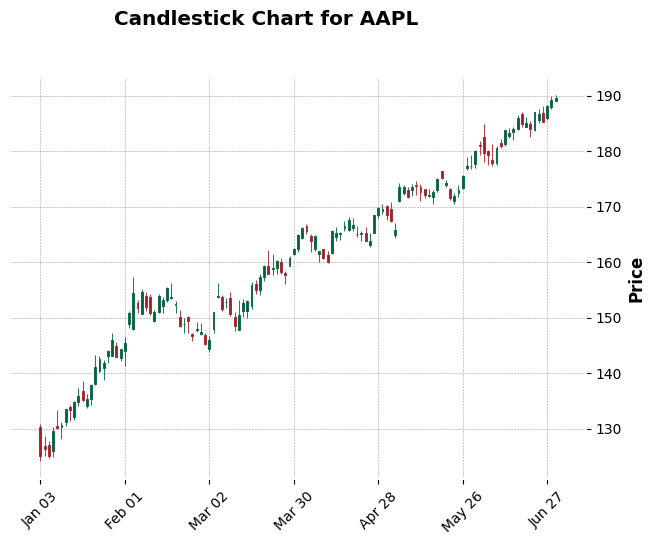

<Mpf_Figure size 1600x900 with 0 Axes>

<Mpf_Figure size 1600x900 with 0 Axes>

In [35]:
import mplfinance as mpf
mpf.plot(data, type='candle', style='charles', title=f'Candlestick Chart for {stock}', ylabel='Price')
mpf.figure(figsize=(16,9))

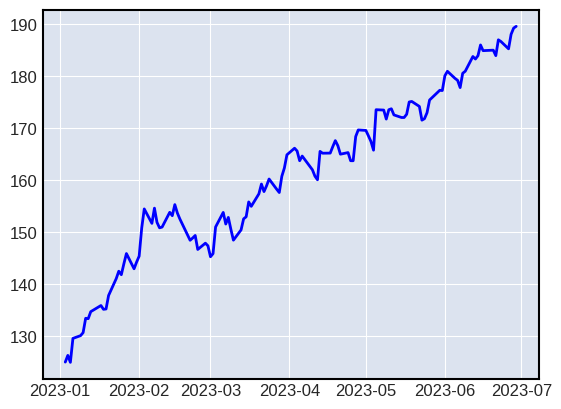

In [36]:
plt.plot(data['Close'],color='blue')

In [37]:
def get_macd(price,slow,fast,smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1-exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

stock_macd = get_macd(data['Close'],26,12,9)
stock_macd.head()

,macd,signal,hist
Date,,,
2023-01-03,0.000000,0.000000,0.000000
2023-01-04,0.102906,0.020581,0.082325
2023-01-05,0.075463,0.031558,0.043905
2023-01-06,0.420053,0.109257,0.310797
2023-01-09,0.727524,0.232910,0.494614


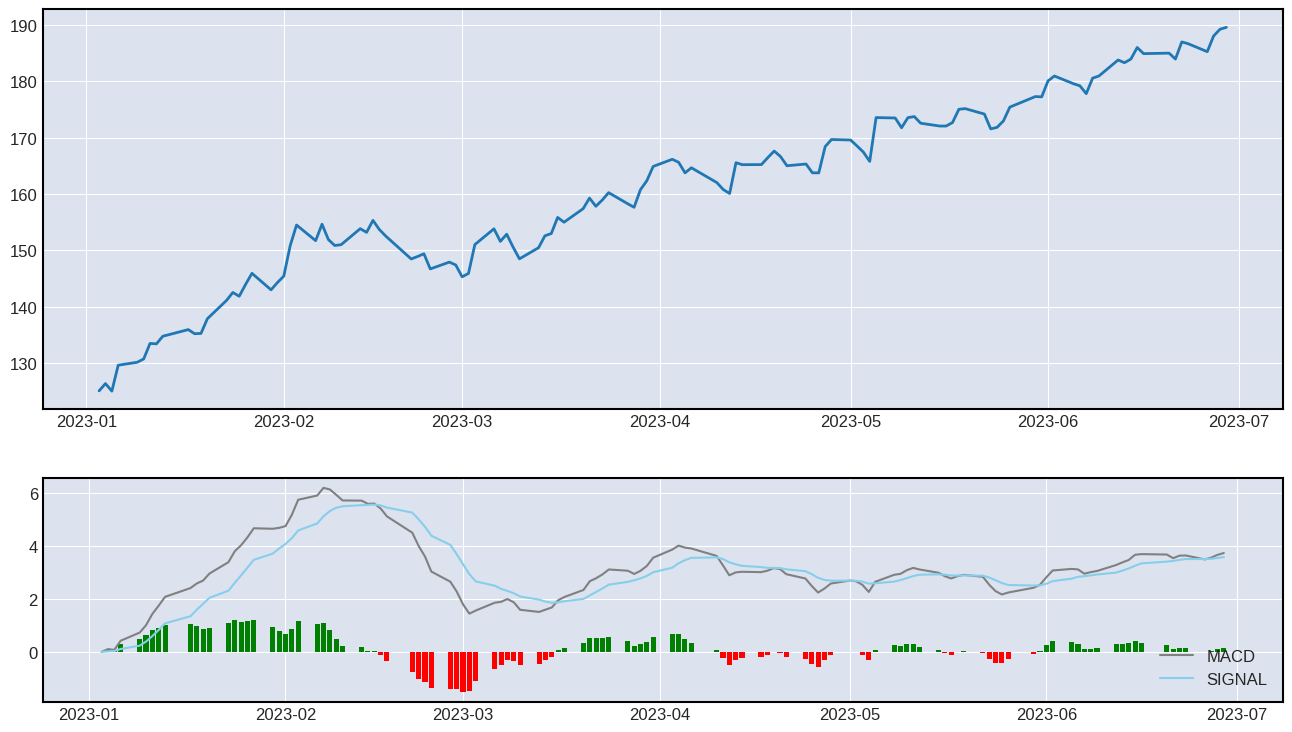

In [38]:
def plot_macd(prices, macd, signal, hist):
    plt.figure(figsize=(16,9))
    ax1 = plt.subplot2grid((12,3), (0,0), rowspan = 7, colspan = 5)
    ax2 = plt.subplot2grid((12,3), (8,0), rowspan = 6, colspan = 5)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = 'red')
        else:
            ax2.bar(prices.index[i], hist[i], color = 'green')

    plt.legend(loc = 'lower right')
plot_macd(data['Close'], stock_macd['macd'], stock_macd['signal'], stock_macd['hist'])

In [39]:
macd_buy_signals=[]
macd_sell_signals=[]
macd_signals=[]

macd_status=''
for i in range(len(stock_macd)):
    if stock_macd['macd'][i] < stock_macd['signal'][i] and macd_status != 'SELL':
        macd_sell_signals.append(i)
        macd_signals.append(('SELL'))
        macd_status = 'SELL'
    elif stock_macd['macd'][i] > stock_macd['signal'][i] and macd_status != 'BUY':
        macd_buy_signals.append(i)
        macd_signals.append(('BUY'))
        macd_status = 'BUY'
    else:
        macd_signals.append(('NONE'))

print(macd_sell_signals)
print(macd_buy_signals)
print(macd_signals)

[31, 67, 82, 92, 96, 119]
[1, 50, 81, 85, 95, 102, 120]
['NONE', 'BUY', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'SELL', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'BUY', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'SELL', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'BUY', 'SELL', 'NONE', 'NONE', 'BUY', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'SELL', 'NONE', 'NONE', 'BUY', 'SELL', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'BUY', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE

In [40]:
strategy_df=pd.DataFrame()
strategy_df.index=data.index
strategy_df['Signal']=macd_signals
strategy_df

,Signal
Date,
2023-01-03,NONE
2023-01-04,BUY
2023-01-05,NONE
2023-01-06,NONE
2023-01-09,NONE
...,...
2023-06-23,NONE
2023-06-26,SELL
2023-06-27,BUY


In [41]:
investment=100000 #100k
number_of_stocks=[]
in_hand =[]
returns=[]
in_hand.append(investment)
number_of_stocks.append(0)
returns.append(investment)

for i in range(1,len(data)):
    if macd_signals[i]=='BUY':
        temp = in_hand[i-1] // data['Close'][i]
        in_hand.append(in_hand[i-1]-temp * data['Close'][i])
        number_of_stocks.append(temp)
    elif macd_signals[i]=='SELL':
        in_hand.append(in_hand[i-1]+number_of_stocks[i-1] * data['Close'][i])
        number_of_stocks.append(0)
    elif macd_signals[i]=='NONE':
        in_hand.append(in_hand[i-1])
        number_of_stocks.append(number_of_stocks[i-1])

    returns.append(in_hand[i] + number_of_stocks[i] * data['Close'][i])


macd_returns=in_hand[-1] + number_of_stocks[-1] * data['Close'][-1]
print("The return on investing 100000 rupees is:",macd_returns)

macd_percentage_returns=format((((macd_returns)-(investment))/investment)*(100),".2f")
print("The percentage return in case of macd is:",macd_percentage_returns,"%")
#returns

The return on investing 100000 rupees is: 129567.94758605957
The percentage return in case of macd is: 29.57 %


In [42]:
len(returns)

123

In [43]:
len(in_hand)

123

In [44]:
len(number_of_stocks)

123

In [45]:
number_of_stocks

[0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 791.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 780.0,
 780.0,
 780.0,
 780.0,
 780.0,
 780.0,
 780.0,
 780.0,
 780.0,
 780.0,
 780.0,
 780.0,
 780.0,
 780.0,
 780.0,
 780.0,
 780.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 739.0,
 0,
 0,
 0,
 718.0,
 718.0,
 718.0,
 718.0,
 718.0,
 718.0,
 718.0,
 0,
 0,
 0,
 705.0,
 0,
 0,
 0,
 0,
 0,
 0,
 693.0,
 693.0,
 693.0,
 693.0,
 693.0,
 693.0,
 693.0,
 693.0,
 693.0,
 693.0,
 693.0,
 693.0,
 693.0,
 693.0,
 693.0,
 693.0,
 693.0,
 0,
 683.0,
 683.0,
 683.0]

In [46]:
strategy_df['number_of_stocks']=number_of_stocks
strategy_df['in_hand']=in_hand
strategy_df['returns']=returns
strategy_df

,Signal,number_of_stocks,in_hand,returns
Date,,,,
2023-01-03,NONE,0.0,100000.000000,100000.000000
2023-01-04,BUY,791.0,49.239517,100000.000000
2023-01-05,NONE,791.0,49.239517,98940.056862
2023-01-06,NONE,791.0,49.239517,102578.655655
2023-01-09,NONE,791.0,49.239517,102997.884689
...,...,...,...,...
2023-06-23,NONE,693.0,130.845459,129500.080383
2023-06-26,SELL,0.0,128522.958420,128522.958420
2023-06-27,BUY,683.0,77.980087,128522.958420


In [47]:
pnl=[]
for i in range(len(data)):
    pnl.append(((returns[i]-investment)/investment)*100)

strategy_df['pnl']=pnl
strategy_df

,Signal,number_of_stocks,in_hand,returns,pnl
Date,,,,,
2023-01-03,NONE,0.0,100000.000000,100000.000000,0.000000
2023-01-04,BUY,791.0,49.239517,100000.000000,0.000000
2023-01-05,NONE,791.0,49.239517,98940.056862,-1.059943
2023-01-06,NONE,791.0,49.239517,102578.655655,2.578656
2023-01-09,NONE,791.0,49.239517,102997.884689,2.997885
...,...,...,...,...,...
2023-06-23,NONE,693.0,130.845459,129500.080383,29.500080
2023-06-26,SELL,0.0,128522.958420,128522.958420,28.522958
2023-06-27,BUY,683.0,77.980087,128522.958420,28.522958


In [48]:
risk_free_rate=0.05
sharpe_ratio=(np.mean(returns)-risk_free_rate)/(np.std(returns))
sharpe_ratio

17.465884968293587

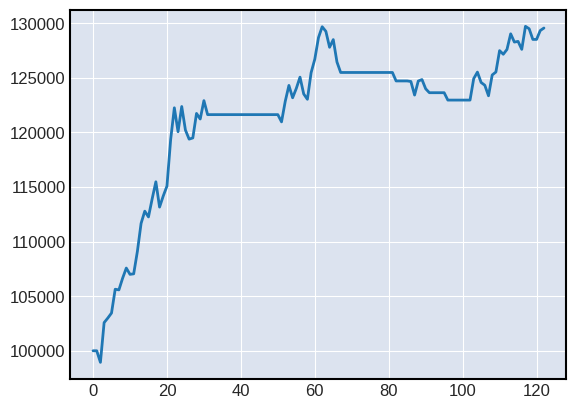

In [49]:
plt.plot(returns)

In [50]:
max_drawdown = 0
peak = returns[0]

for return_value in returns:
    if return_value > peak:
        peak = return_value
    drawdown = (peak - return_value) / peak
    max_drawdown = max(max_drawdown, drawdown)

print("The maximum drawdown is:", max_drawdown)

The maximum drawdown is: 0.05180578748054334


In [51]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488876,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069321,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597061,70790800
...,...,...,...,...,...,...
2023-06-23,185.550003,187.559998,185.009995,186.679993,186.428238,53079300
2023-06-26,186.830002,188.050003,185.229996,185.270004,185.020157,48088700
2023-06-27,185.889999,188.389999,185.669998,188.059998,187.806381,50730800


In [52]:
strategy_df

,Signal,number_of_stocks,in_hand,returns,pnl
Date,,,,,
2023-01-03,NONE,0.0,100000.000000,100000.000000,0.000000
2023-01-04,BUY,791.0,49.239517,100000.000000,0.000000
2023-01-05,NONE,791.0,49.239517,98940.056862,-1.059943
2023-01-06,NONE,791.0,49.239517,102578.655655,2.578656
2023-01-09,NONE,791.0,49.239517,102997.884689,2.997885
...,...,...,...,...,...
2023-06-23,NONE,693.0,130.845459,129500.080383,29.500080
2023-06-26,SELL,0.0,128522.958420,128522.958420,28.522958
2023-06-27,BUY,683.0,77.980087,128522.958420,28.522958


In [53]:
macd_buy_signals

[1, 50, 81, 85, 95, 102, 120]

In [54]:
macd_sell_signals

[31, 67, 82, 92, 96, 119]

In [55]:
holding_period=[]
for i in range(min(len(macd_buy_signals),len(macd_sell_signals))):
    holding_period.append(macd_sell_signals[i]-macd_buy_signals[i])

holding_period

[30, 17, 1, 7, 1, 17]

In [56]:
np.mean(holding_period)

12.166666666666666